# Level 3

## Task 1

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [45]:
df = pd.read_csv('Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


### Build a regression model to predict the aggregate rating 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
df['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

In [52]:
df['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Has Table booking'] = le.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])

In [54]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),1,0,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),1,0,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),1,0,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),0,0,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),1,0,No,No,4,4.8,Dark Green,Excellent,229


## Split the dataset

In [63]:
X = df[['Average Cost for two', 'Votes', 'Price range', 'Has Table booking', 'Has Online delivery']]
Y = df['Aggregate rating']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Experiment with different algorithms

In [70]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Iterate through each model, train, evaluate, and print results
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE) to evaluate model accuracy
    r2trian= model.score(X_train,y_train)
    r2test= model.score(X_test, y_test)   

    # Calculate Mean Squared Error (MSE) to evaluate model accuracy
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R2) to assess the goodness of fit
    r2 = r2_score(y_test, y_pred)

    # Print model performance metrics
    print(f"r2trian: {r2trian}")
    print(f"r2test: {r2test}")
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("---------------------------")

r2trian: 0.2626985322441924
r2test: 0.26344464090219477
Model: Linear Regression
Mean Squared Error: 1.6764802747031446
R-squared: 0.26344464090219477
---------------------------
r2trian: 0.991032937894125
r2test: 0.9094285084024413
Model: Decision Tree
Mean Squared Error: 0.20615058629094318
R-squared: 0.9094285084024413
---------------------------
r2trian: 0.9854899837158123
r2test: 0.9408831657040493
Model: Random Forest
Mean Squared Error: 0.13455635801964955
R-squared: 0.9408831657040493
---------------------------


## Task 2

## Relationship Between the Type of Cuisine and the Restaurant's Rating


In [92]:
top_cuisinesall = df['Cuisines'].value_counts().nlargest(top_n)
top_cuisinesall

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
South Indian                      112
Bakery, Fast Food                 108
Name: Cuisines, dtype: int64

In [93]:
top_n = 15
top_cuisines = df['Cuisines'].value_counts().nlargest(top_n).index
top_cuisines

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food',
       'Pizza, Fast Food', 'Chinese, Fast Food', 'Mithai, Street Food',
       'South Indian', 'Bakery, Fast Food'],
      dtype='object')

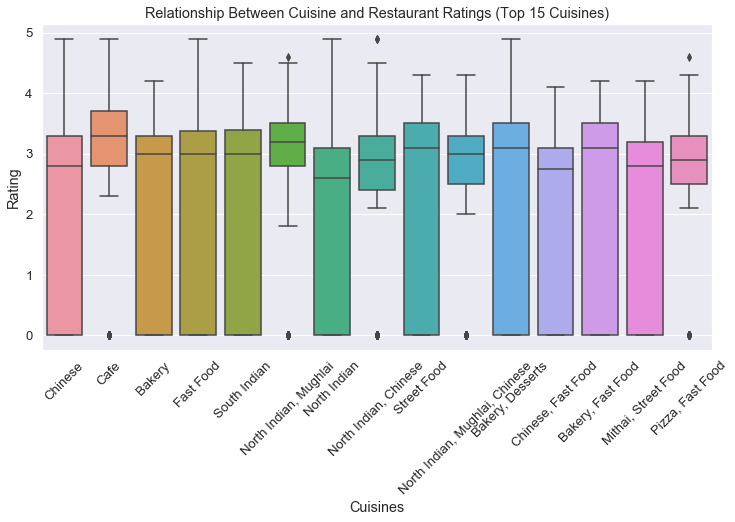

In [91]:
#Filter the dataset to include only the top 15 cuisines
df_filtered = df[df['Cuisines'].isin(top_cuisines)]

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Cuisines', y='Aggregate rating')

# Set labels
plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {top_n} Cuisines)')
plt.xlabel('Cuisines')
plt.ylabel('Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display Chart
plt.show() 

## most popular cuisines

In [99]:
top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(10)
print("Top Cuisines by Number of Votes:",top_cuisines)

Top Cuisines by Number of Votes: Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


##  cuisines that tend to receive higher ratings

In [100]:
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

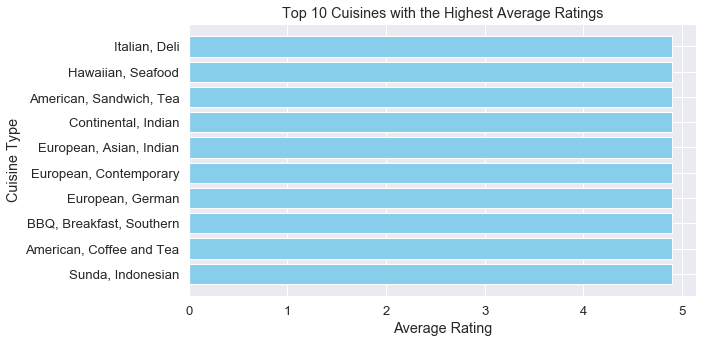

In [101]:
# Count Plot Visualization Code for the cuisines with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='skyblue')

# Set labels
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 10 Cuisines with the Highest Average Ratings')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

# Display Chart
plt.show()

## Task 3

## The distribution of ratings

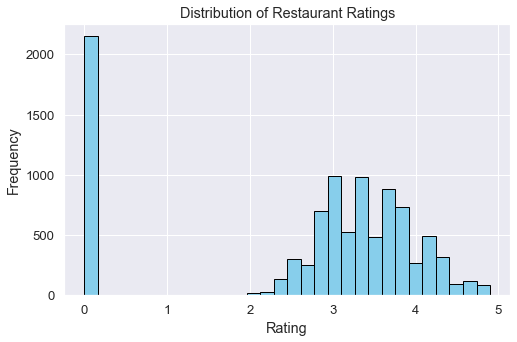

In [102]:
# Distribution of ratings by using a histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Aggregate rating'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')

# Display Chart
plt.show()

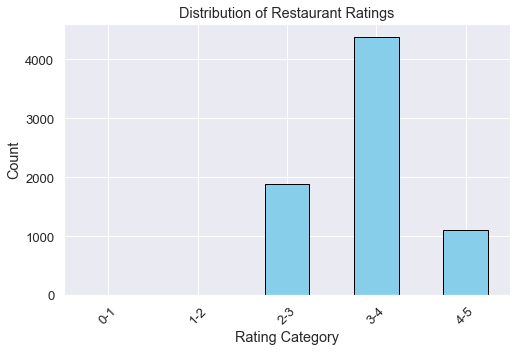

In [103]:
# Distribution of ratings by using a bar plot
# Group ratings into categories (e.g., 0-1, 1-2, 2-3, etc.)
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels)

# Count the number of restaurants in each rating category
rating_counts = df['Rating Category'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display Chart
plt.show()

## Comparing Average Ratings for Different Cuisines


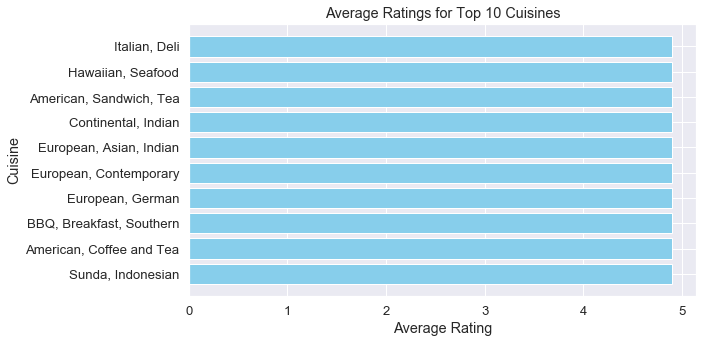

In [104]:

# Comparing average ratings of different cuisines by using a bar plot
# Group the data by cuisine and calculate the mean rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Count Plot Visualization Code for the cuisines with the highest ratings
plt.figure(figsize=(10, 5))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color='skyblue')

# Add labels and title
plt.ylabel('Cuisine')
plt.xlabel('Average Rating')
plt.title('Average Ratings for Top 10 Cuisines')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.tight_layout()

# Display Chart
plt.show()

## the relationship between various features and the target variable

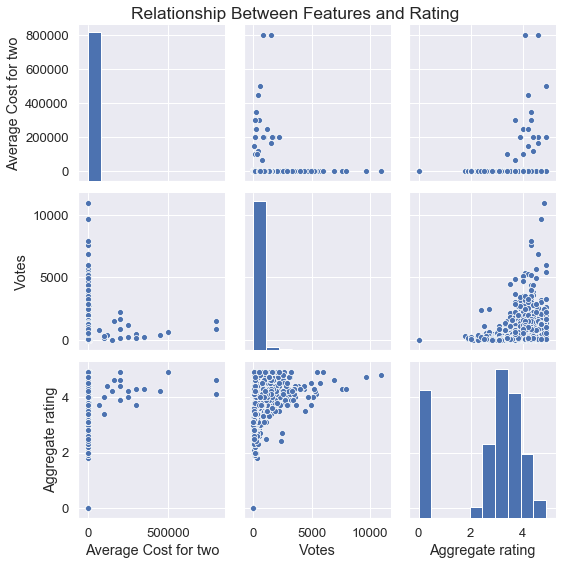

In [105]:
# Visualizing the relationship between various features and the target variable by using pair plot
sns.pairplot(data=df, vars=['Average Cost for two', 'Votes', 'Aggregate rating'])
plt.suptitle("Relationship Between Features and Rating", y=1.02)

# Display Chart
plt.show()